# 회귀(Regression)

지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - mean_squared_error() 
    - 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    
- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - r2_score()
    - 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}\\
    R^2 = 1 - \cfrac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    



# Guide
- 결정계수. 바이오에선 90%, 공학에선 70%, 사회과학에선 13% 정도가 기준이 된다고 한다.

In [9]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.style.use('seaborn')

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [10]:
X, y = make_regression(n_samples=100, # 샘플(행) 수
                      n_features=1, # feature(컬럼) 수
                      n_informative=1, # target을 만드는 영향을 주는 feature 개수
                      noise=50, # 잡읍
                      coef=False, # feature간 상관성 여부
                      random_state=1)

In [11]:
X.shape, y.shape

((100, 1), (100,))

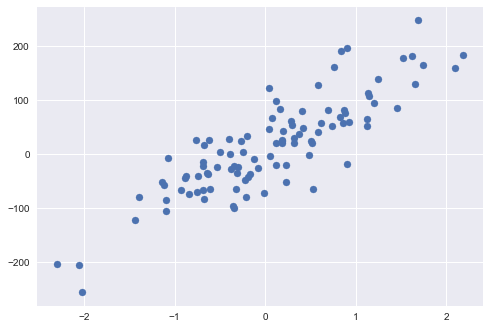

In [12]:
plt.scatter(X, y)

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
pred = lr.predict(X)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
r2
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("MAE:", mean_absolute_error(y, pred))
print("R^2:", r2)

MSE: 2078.5472792307764
RMSE: 45.59108771712709
MAE: 34.84147804463735
R^2: 0.7321024057172182


In [19]:
score = cross_val_score(lr, X, y, cv=5) #, scoring='r2') # R2 # scoring 생략: 분류-accuracy, 회귀-r2
score, np.mean(score)

(array([0.58124097, 0.82853824, 0.52826294, 0.76611492, 0.7184243 ]),
 0.6845162761863837)

## 기존 분류 모델의 회귀 모델